In [1]:
from data_processing import ProcessData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter


DEBUG:matplotlib:matplotlib data path: /home/abhi/ECE143/ece143/lib/python3.10/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/abhi/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/home/abhi/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/abhi/.cache/matplotlib/fontlist-v330.json


In [2]:
data_directory = 'data'
data_processor = ProcessData(data_directory)
data = data_processor.process()

DEBUG:data_processing:Initialized ProcessData with data directory: data
DEBUG:read_data:Initialized ReadData with data directory: data
DEBUG:read_data:Processed 2 datasets
DEBUG:data_processing:Processing layoffs data
/home/abhi/ECE143/ece143_data_analysis_project/data_processing.py:87: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stage_data = funds.groupby('stage').mean().sort_values(by='total_laid_off', ascending=False)
DEBUG:data_processing:Processing salary data


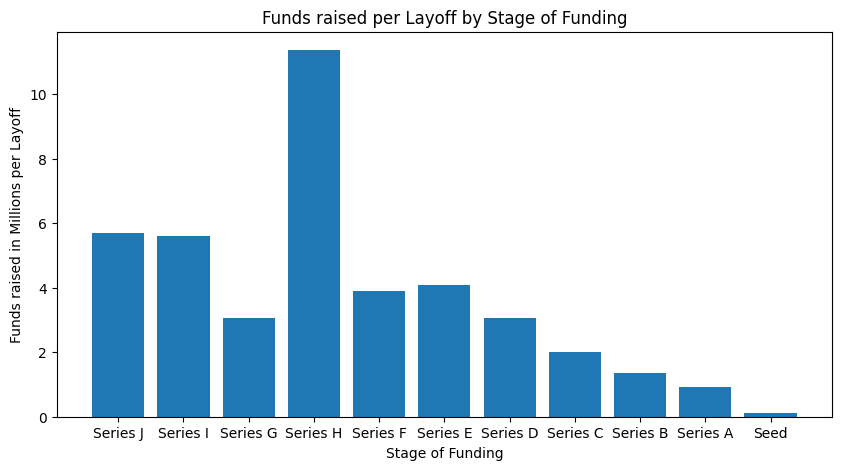

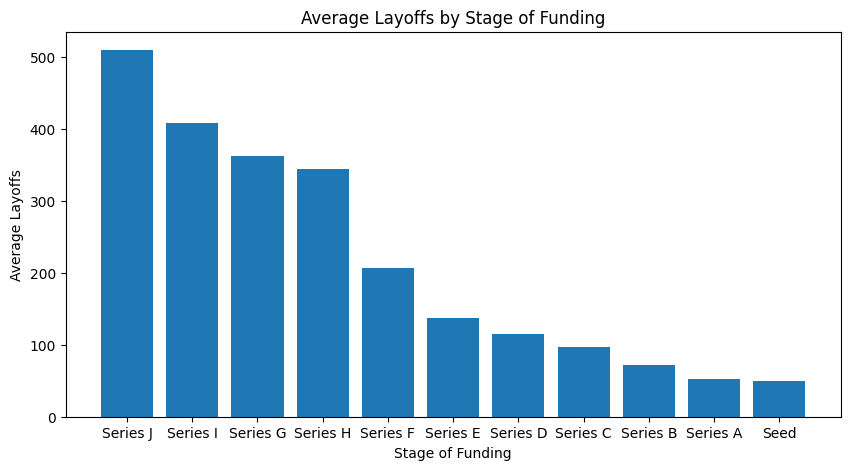

DEBUG:matplotlib.ticker:vmin 2.1987343156628065 vmax 2046.6319954821283
DEBUG:matplotlib.ticker:ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])
DEBUG:matplotlib.ticker:vmin 2.1987343156628065 vmax 2046.6319954821283
DEBUG:matplotlib.ticker:ticklocs array([2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04, 7.e+04, 8.e+04, 9.e+04,
       2.e+05, 3.e+05, 4.e+05, 5.e+05, 6.e+05, 7.e+05, 8.e+05, 9.e+05])
DEBUG:matplotlib.ticker:vmin 2.1987343156628065 vmax 2046.6319954821283
DEBUG:matplotlib.ticker:ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])
DEBUG:matplotlib.ticker:vmin 2.1987343156628065 vmax 2046.6

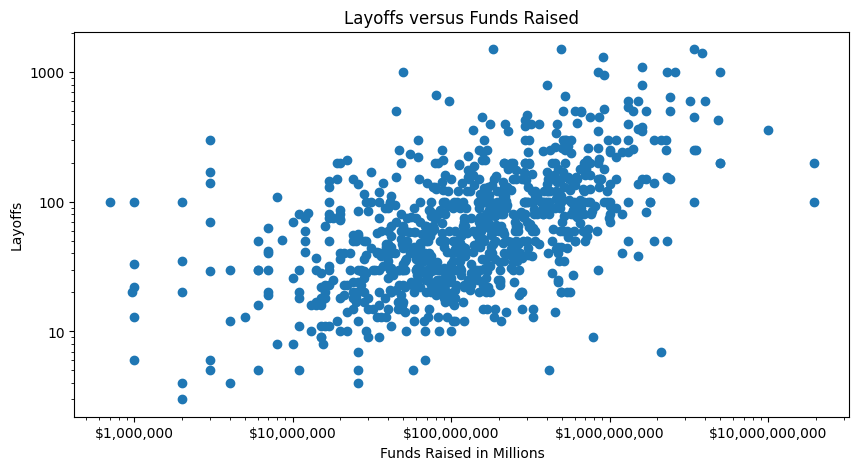

In [4]:
# Funding Plots
funding_data: pd.DataFrame = data['layoff_processed']['__company_funding_stage']
funding_raised_layoffs: pd.DataFrame = data['layoff_processed']['__company_funding_raised']
funding_raised_layoffs.dropna(inplace=True)

# Funds raised per Layoff by Stage
fig = plt.figure(figsize=(10, 5))
plt.bar(funding_data.index, funding_data['Funds raised per Layoff'])
plt.xlabel('Stage of Funding')
plt.ylabel('Funds raised in Millions per Layoff')
plt.title('Funds raised per Layoff by Stage of Funding')
plt.show()

# Stage of Funding versus average layoffs
fig = plt.figure(figsize=(10, 5))
plt.bar(funding_data.index, funding_data['total_laid_off'])
plt.xlabel('Stage of Funding')
plt.ylabel('Average Layoffs')
plt.title('Average Layoffs by Stage of Funding')
plt.show()

# Layoffs versus Funds Raised
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(funding_raised_layoffs['funds_raised'], funding_raised_layoffs['total_laid_off'])
plt.xlabel('Funds Raised in Millions')
plt.ylabel('Layoffs')
plt.xscale('log')
plt.yscale('log')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, loc: "${:,.0f}".format(float(x) * 1e6)))
ax.get_yaxis().set_major_formatter(ScalarFormatter())
plt.title('Layoffs versus Funds Raised')
plt.show()